In [1]:
from os import listdir
from os.path import isfile, join
import sys
sys.path.append("/Users/andyreagan/tools/python")
from kitchentable.dogtoys import *
from json import loads
from re import findall,UNICODE
from labMTsimple.labMTsimple.speedy import LabMT
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
def longest_common_substring(s1, s2):
    m = [[0] * (1 + len(s2)) for i in range(1 + len(s1))]
    longest, x_longest = 0, 0
    for x in range(1, 1 + len(s1)):
        for y in range(1, 1 + len(s2)):
            if s1[x - 1] == s2[y - 1]:
                m[x][y] = m[x - 1][y - 1] + 1
                if m[x][y] > longest:
                    longest = m[x][y]
                    x_longest = x
            else:
                m[x][y] = 0
    return s1[x_longest - longest: x_longest]

In [2]:
from gutenbergdb.bookclass import book

In [3]:
my_book = book(9781613823347)

Winesburg, Ohio


In [4]:
my_book.word_lists_by_chapter

[['project',
  "gutenberg's",
  'etext',
  'winesburg',
  'ohio',
  'by',
  'sherwood',
  'anderson',
  '[we',
  'seem',
  'to',
  'have',
  'lost',
  'the',
  'wnbrg10',
  'txt',
  'file',
  'this',
  'replaces',
  'it',
  ']',
  'please',
  'take',
  'a',
  'look',
  'at',
  'the',
  'important',
  'information',
  'in',
  'this',
  'header',
  'we',
  'encourage',
  'you',
  'to',
  'keep',
  'this',
  'file',
  'on',
  'your',
  'own',
  'disk',
  'keeping',
  'an',
  'electronic',
  'path',
  'open',
  'for',
  'the',
  'next',
  'readers',
  'do',
  'not',
  'remove',
  'this',
  '**welcome',
  'to',
  'the',
  'world',
  'of',
  'free',
  'plain',
  'vanilla',
  'electronic',
  'texts**',
  '**etexts',
  'readable',
  'by',
  'both',
  'humans',
  'and',
  'by',
  'computers',
  'since',
  '1971**',
  'these',
  'etexts',
  'prepared',
  'by',
  'hundreds',
  'of',
  'volunteers',
  'and',
  'donations',
  'information',
  'on',
  'contacting',
  'project',
  'gutenberg',
  'to'

In [5]:
import pickle
f = open("test-pickle.p","wb")
pickle.dump(my_book,f,pickle.HIGHEST_PROTOCOL)
f.close()
# that was 938K

In [6]:
my_LabMT = LabMT()
# my_book.chop(my_LabMT)

loading LabMT with stopVal=0.0, for 10222 words


In [7]:
# my_book.all_word_list

In [8]:
f = open("test-pickle.p","wb")
pickle.dump(my_book,f,pickle.HIGHEST_PROTOCOL)
f.close()
# that was 7.7M

In [10]:
timeseries,all_fvecs,windows = my_book.chopper_sliding(my_LabMT,num_points=500)

splitting the book into 500 chunks of minimum size 10000
there are 75960 words in the book
step size 132


In [11]:
import lz4
f = open("data/Kindle-combined-txt/0002246821/all-fvecs-10000-500.p.lz4","rb")
all_fvecs = pickle.loads(lz4.decompress(f.read()))
f.close()

In [12]:
all_fvecs[0,:].toarray().squeeze()

array([0, 0, 1, ..., 0, 0, 0], dtype=int32)

In [13]:
f = open("test-pickle.p","wb")
pickle.dump(my_book,f,pickle.HIGHEST_PROTOCOL)
f.close()
# that was 1.4M

In [14]:
from numpy import matrix

In [15]:
all_fvecs

<500x10222 sparse matrix of type '<class 'numpy.int32'>'
	with 753722 stored elements in LInked List format>

In [16]:
a = matrix(all_fvecs)

In [17]:
from scipy.sparse import lil_matrix,issparse

In [18]:
sp = lil_matrix(all_fvecs,dtype="i")

In [19]:
sp

<500x10222 sparse matrix of type '<class 'numpy.int32'>'
	with 753722 stored elements in LInked List format>

In [20]:
f = open("test-lil.p","wb")
pickle.dump(sp,f,pickle.HIGHEST_PROTOCOL)
f.close()

In [21]:
f = open("test-full.p","wb")
pickle.dump(a,f,pickle.HIGHEST_PROTOCOL)
f.close()

so the object is taking up roughly 1.5M in memory, storing just the timeseries.
now let's load a few thousand of them and crunch the timeseries like above

In [22]:
listdir("data/Kindle-combined-txt/")

['0002246821',
 '0002246872',
 '0002247224',
 '0006483348',
 '0006497012',
 '0060588489',
 '0060792825',
 '0060792981',
 '006122815X',
 '0061697702',
 '021ea7ba-22d5-4949-8e26-1cb004e1161c',
 '02_The_Restaurant_at_the_End_of_the_Universe',
 '0307408841',
 '0312711085',
 '0312866909',
 '0312873077',
 '0345335996',
 '0345418557',
 '0345444817',
 '034548410X',
 '0380759470',
 '0380803232',
 '0380978008',
 '0394739752',
 '03_Life,_the_Universe_and_Everything',
 '0426200373',
 '0426203194',
 '0439064864',
 '0439136350',
 '0439139597',
 '043935806X',
 '0439784549',
 '0441317553',
 '0441370624',
 '0441731007',
 '0451214145',
 '0451458435',
 '04_So_Long,_and_Thanks_For_All_the_Fish',
 '0545029368',
 '0553263285',
 '0553292455',
 '0553381695',
 '0553898272',
 '0586203222',
 '0590353403',
 '05_Mostly_Harmless',
 '0688124089',
 '073123c9-eb3b-413a-b27f-b1c4b7de004d',
 '0748b91b-cfe3-4885-ae83-e78843b3cb7d',
 '0759581428',
 '0760798370',
 '0765302306',
 '076534551X',
 '0812513754',
 '0812534867',


In [23]:
book_folders = listdir("data/Kindle-combined-txt/")
len(book_folders)

3976

In [24]:
all_books = [book(b) for b in book_folders[:100]]

King Of Foxes
Exile's Return
Jimmy the Hand
Krondor: The Betrayal
Rise of a Merchant Prince
Ain’t She Sweet?
Into a Dark Realm
Wrath of a Mad God
Service Included: Four-Star Secrets of an Eavesdropping Waiter
Savor: Mindful Eating, Mindful Life
Golden Age of Science Fiction Vol VIII
02 The Restaurant at the End of the Universe
In the Garden of Beasts: Love, Terror, and an American Family in Hitler's Berlin
The Machine Crusade
Zombie Lover
Wheel of Time 11 - Knife of Dreams
A Spell for Chameleon
Dragon on a Pedestal
Ilse Witch
Armageddon's Children
Isle of View
Krondor: The Assassins
Krondor: Tear of the Gods
Dragons of Winter Night
03 Life, the Universe and Everything
Doctor Who: Android Invasion
Doctor Who: The Mysterious Planet
Harry Potter and the Chamber of Secrets
Harry Potter and the Prisoner of Azkaban
Harry Potter and the Goblet of Fire
Harry Potter and the Order of the Phoenix
Harry Potter and the Half-Blood Prince
The Hard Way Up
The Inheritors
The Road to the Rim
John Wayne 

In [25]:
len(my_book.word_lists_by_chapter)

0

In [38]:
for b in all_books:
    b.chopper_sliding(my_LabMT,num_points=500,stop_val=1.0)

splitting the book into 500 chunks of minimum size 10000
there are 104080 words in the book
step size 188
loading from cache
splitting the book into 500 chunks of minimum size 10000
there are 98614 words in the book
step size 177
loading from cache
splitting the book into 500 chunks of minimum size 10000
there are 118275 words in the book
step size 216
loading from cache
splitting the book into 500 chunks of minimum size 10000
there are 132709 words in the book
step size 245
loading from cache
splitting the book into 500 chunks of minimum size 10000
there are 154959 words in the book
step size 290
loading from cache
splitting the book into 500 chunks of minimum size 10000
there are 117052 words in the book
step size 214
loading from cache
splitting the book into 500 chunks of minimum size 10000
there are 106201 words in the book
step size 192
loading from cache
splitting the book into 500 chunks of minimum size 10000
there are 147664 words in the book
step size 275
loading from cache
s

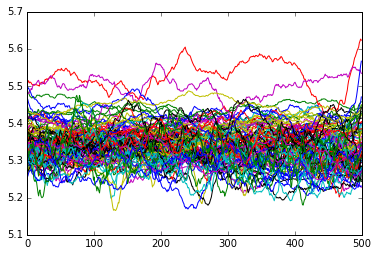

In [27]:
plt.figure()
for b in all_books:
    plt.plot(b.timeseries)g

In [28]:
a = [1,2,3,3]

In [30]:
np.unique(a)

array([1, 2, 3])

In [32]:
all_fvecs

<500x10222 sparse matrix of type '<class 'numpy.int32'>'
	with 753722 stored elements in LInked List format>

In [34]:
all_fvecs[0,np.unique(a)] = 0

In [35]:
all_fvecs

<500x10222 sparse matrix of type '<class 'numpy.int32'>'
	with 753721 stored elements in LInked List format>

In [36]:
all_fvecs[:,np.unique(a)] = 0

In [37]:
all_fvecs

<500x10222 sparse matrix of type '<class 'numpy.int32'>'
	with 752959 stored elements in LInked List format>

In [40]:
import hashlib

In [41]:
hashlib.md5("test".encode("utf-8")).hexdigest()

'098f6bcd4621d373cade4e832627b4f6'

In [42]:
hashlib.md5("tset".encode("utf-8")).hexdigest()

'751ec45015a704a39dc403001c963e97'